## Several tests of different gravity models for verification:

>### Teste 01: Modelo da haste fina: Neste teste verifica-se a implementacao da componente vertical da atração gravitacional produzida por uma haste fina com inclinação e seção vertical assumidas pelo usuario.

### Colocar a equação aqui:



In [1]:
# import das bibliotecas:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from modules.gravity2D import g_rod

In [3]:
# definicao das posicoes de observacao:
xmin  = -10.0
xmax  = +10.0
ndata = 40
x = np.linspace(xmin, xmax, ndata, endpoint=False )
z = np.copy(x)*0.0

In [4]:
# definicao da haste:
haste=[0.2, 1.0, 100.0, 45.0, 1000.0, 1.0]


In [5]:
gz_haste=g_rod(x,z,haste)

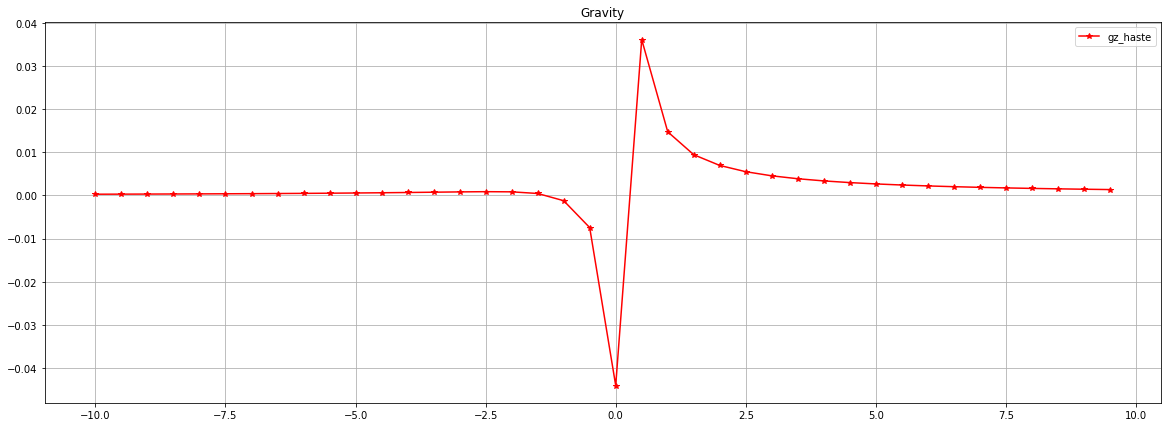

In [6]:
plt.figure(figsize=(20,7), facecolor='w')
plt.title('Gravity')
plt.plot(x,gz_haste,'*-r', label='gz_haste')
plt.legend()
plt.grid()

plt.show()

### TODO: Fazer o modulo auxiliars para limpar a implementação (HÁ UM ERRO A SER LOCALIZADO!!!!!!)